Coloring found:
  WA: red
  NT: green
  SA: blue
  Q: red
  NSW: green
  V: red
  T: red


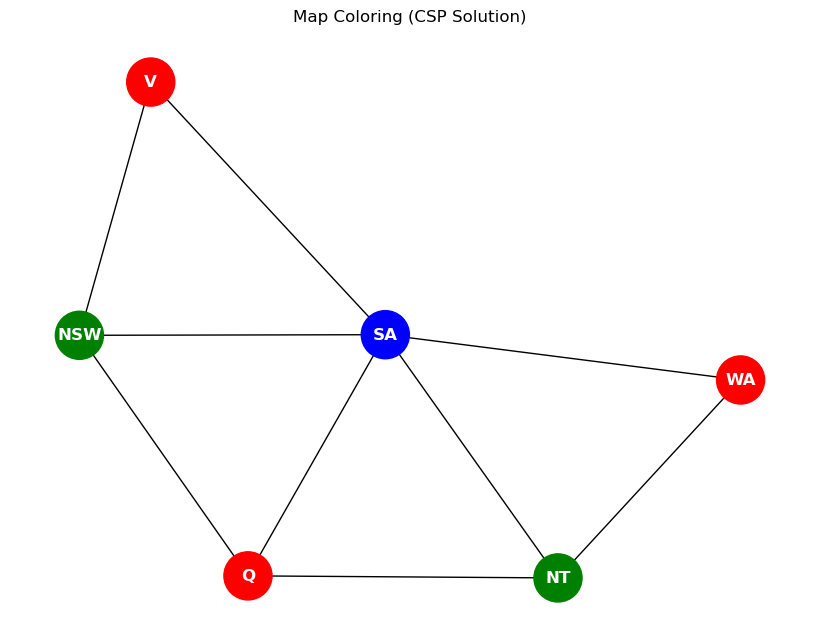

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the map as a graph (Australia)
adjacency = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []  # Tasmania is isolated
}

colors = ['red', 'green', 'blue']

# Backtracking CSP solver
def is_valid(state, node, color):
    for neighbor in adjacency[node]:
        if state.get(neighbor) == color:
            return False
    return True

def backtrack(state):
    if len(state) == len(adjacency):
        return state

    unassigned = [n for n in adjacency if n not in state]
    node = unassigned[0]

    for color in colors:
        if is_valid(state, node, color):
            state[node] = color
            result = backtrack(state)
            if result:
                return result
            del state[node]

    return None

# Visualization
def visualize_map_coloring(solution):
    G = nx.Graph()
    for node, neighbors in adjacency.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42)  # Positioning of nodes
    node_colors = [solution.get(node, 'gray') for node in G.nodes]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1200, font_color='white', font_weight='bold')
    plt.title("Map Coloring (CSP Solution)")
    plt.show()

# Solve and visualize
solution = backtrack({})
if solution:
    print("Coloring found:")
    for region, color in solution.items():
        print(f"  {region}: {color}")
    visualize_map_coloring(solution)
else:
    print("No solution found.")
